In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/Social_Net_class.csv.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
x= data[['Gender','Age','EstimatedSalary']]
y = data['Purchased']


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20)
x_train.head(),y_train.head()

(     Gender  Age  EstimatedSalary
 324       0   48           131000
 93        0   29            28000
 129       0   26            84000
 106       0   26            35000
 329       0   47           107000,
 324    1
 93     0
 129    0
 106    0
 329    1
 Name: Purchased, dtype: int64)

In [17]:
x_train[:3]

,Gender,Age,EstimatedSalary
324,0,48,131000
93,0,29,28000
129,0,26,84000


 data score without scaling

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100

88.4375

In [22]:
knn.score(x_test,y_test)*100

81.25

Without scaling

In [23]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [24]:
display(y_test,y_pred)

,Purchased
253,1
81,0
395,1
199,0
244,0
...,...
248,0
299,1
262,1
311,1


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [26]:
print('Accuracy is:',knn.score(x_test,y_pred))

Accuracy is: 1.0


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[44  4]
 [11 21]]


Text(50.722222222222214, 0.5, 'Actual')

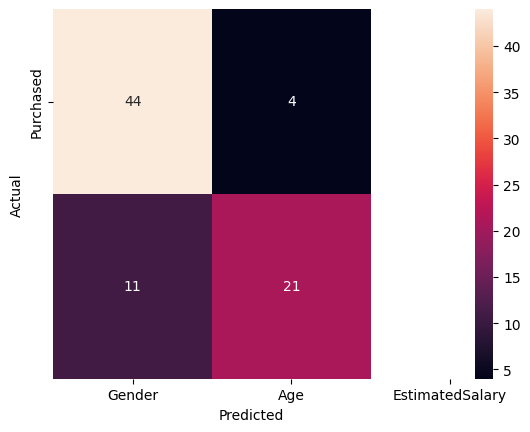

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
           xticklabels=['Gender','Age','EstimatedSalary'],yticklabels=['Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
sum(y_test == 1)

32

In [31]:
#actual
sum(y_test == 0)

48

In [32]:
#predicted
sum(y_pred == 0)

55

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        48
           1       0.84      0.66      0.74        32

    accuracy                           0.81        80
   macro avg       0.82      0.79      0.80        80
weighted avg       0.82      0.81      0.81        80



In [35]:
print(accuracy_score(y_test,y_pred)*100)

81.25


In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score

In [40]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.7986666666666666
for k value: 2 precision is: 0.79
for k value: 3 precision is: 0.8247252747252748
for k value: 4 precision is: 0.8109717868338558
for k value: 5 precision is: 0.8160000000000001
for k value: 6 precision is: 0.79
for k value: 7 precision is: 0.8247252747252748
for k value: 8 precision is: 0.7824451410658307
for k value: 9 precision is: 0.8113590263691683
for k value: 10 precision is: 0.8388539482879107


In [43]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [44]:
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [45]:
print(f1_list)

[0.7893350888742594, 0.7435897435897436, 0.8133333333333334, 0.7763801537386443, 0.7956055186509964, 0.7435897435897436, 0.8133333333333334, 0.7484276729559749, 0.8012916045702931, 0.8254740728310119]


In [46]:
max(f1_list)

0.8254740728310119

In [48]:
f1_list.index( 0.7956055186509964)

4

In [49]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 10  with F1-Score= 0.8254740728310119


Text(0.5, 1.0, 'K neigbours vs f1_score')

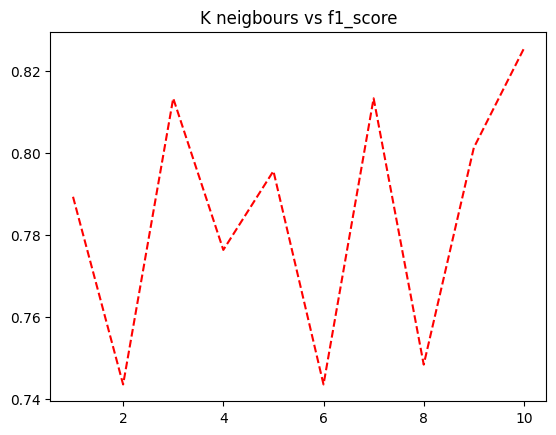

In [50]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=20)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [56]:
model_2.score(x_train,y_train)*100

80.3125